# Mutational burden: Growing population

In [176]:
using Revise
using Plots
gr()

Plots.GRBackend()

In [263]:
using Statistics

In [242]:
include("../src/burdenDyn.jl")
using .BurdenDyn

In [256]:
params = Dict(
    "λ"=>5.0,
    "p"=>0.3,
    "μ"=>1.2,
    "N"=>50000,
    "N init"=>1,
    "N max"=>50000,
    "growth rate"=>1.2
)
evolveTime = 25

25

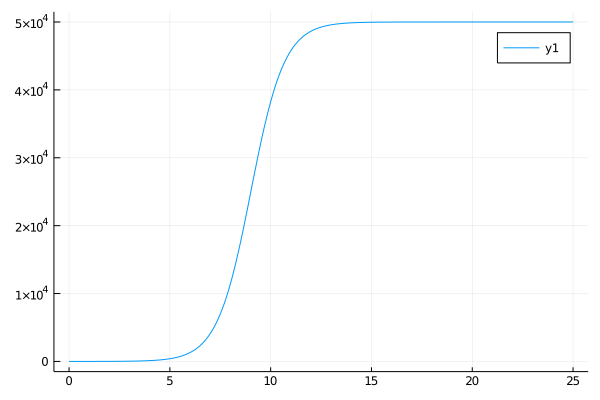

In [258]:
NTime(t) = logisticGrowth(params["N init"], params["N max"], params["growth rate"], t)
# NTime(t) = exponentialCappedGrowth(params["N init"], params["N max"], params["growth rate"], t)
times_t = 0:0.1:evolveTime
f1 = plot(times_t, NTime.(times_t))
display(f1)

In [260]:
mMax = 1500
ϵ = 0.0001
nCells1_m = BurdenDyn.evolveBurden(params, evolveTime, mMax, ϵ);
nCells2_m = BurdenDyn.evolveBurdenGrowth(params, evolveTime, mMax, ϵ);


3.2120039202230205e-5
8
[0.30119421191220214, 0.36143305429464256, 0.21685983257678557, 0.08674393303071418, 0.026023179909214253, 0.006245563178211425, 0.0012491126356422861, 0.00021413359468153452, 3.2120039202230205e-5]


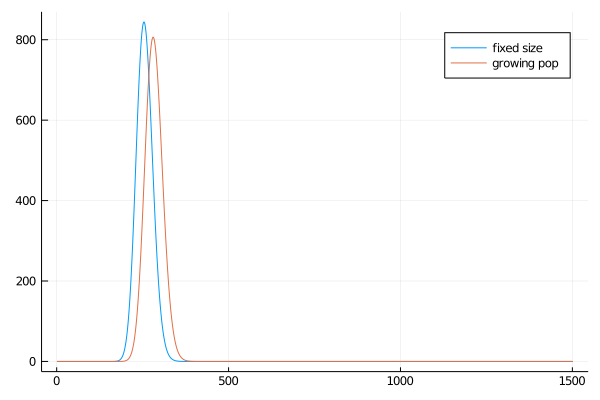

In [261]:
f2 = plot(nCells1_m, label="fixed size")
plot!(nCells2_m, label="growing pop")
# xlims!(1000,1500)
display(f2)

In [262]:

println("number of cells in pop 1: ", sum(nCells1_m))
println("number of cells in pop 2: ", sum(nCells2_m))

mVals_m = 0:length(nCells1_m)-1
mutMean1 = sum(nCells1_m .* mVals_m) / sum(nCells1_m)
mutMean2 = sum(nCells2_m .* mVals_m) / sum(nCells2_m)

nCells1_m .* (mVals_m .- mutMean1).^2

# plot( nCells1_m .* (mVals_m .- mutMean1).^2 / sum(nCells1_m) )

mutVar1 = sum( nCells1_m .* (mVals_m .- mutMean1).^2 ) / sum(nCells1_m)
mutVar2 = sum( nCells2_m .* (mVals_m .- mutMean2).^2 ) / sum(nCells2_m)

println("CP estimated mutation rate in pop 1: ", mutVar1 / mutMean1 - 1)
println("CP estimated mutation rate in pop 2: ", mutVar2 / mutMean2 - 1)

number of cells in pop 1: 49948.40158731053
number of cells in pop 2: 51126.45382294222
CP estimated mutation rate in pop 1: 1.1996949602068416
CP estimated mutation rate in pop 2: 1.284088342896847
